## Data Loading

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv("./data/house_prices.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Data Cleaning & Transformation

In [ ]:
# Check dataset's condition
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We now know some columns has less values than the others. This is how we know there are missing values

In [ ]:
# Show descriptive statistic for the dataset
train.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


The purpose is to give us summary of the dataset. This method is useful to check for unusual values

In [ ]:
# Check the amount of missing values
missing_values = train.isnull().sum()
missing_values[missing_values > 0]

,0
LotFrontage,259
Alley,1369
MasVnrType,872
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


Their amounts are varying, and some values differs greatly than each other

In [ ]:
# Separate columns that has 75% missing values
split_point = len(train) * 75/100
less = missing_values[missing_values < split_point].index
less

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [ ]:
over = missing_values[missing_values >= split_point].index
over

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

Data type might differ among columns

In [ ]:
# We use median to fill missing numeric values, on a column that has < 75% missing values
numeric_features = train[less].select_dtypes(include=['number']).columns
train[numeric_features] = train[numeric_features].fillna(train[numeric_features].median())

In [ ]:
# We use median to fill missing object values, on a column that has < 75% missing values
categorical_features = train[less].select_dtypes(include=['object']).columns
for column in categorical_features:
    train[column] = train[column].fillna(train[column].mode()[0])

We now move on to colums that has majority of missing values

In [ ]:
# We need to drop these columns, because their larger possibility of incorrect representation
df = train.drop(columns=over)

In [ ]:
# Finally, check how many missing values are left
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

,0


## Handling Outliers

Outliers can disrupt learning process, one of the ways to find them is by using Interquartile Range (IQR) method

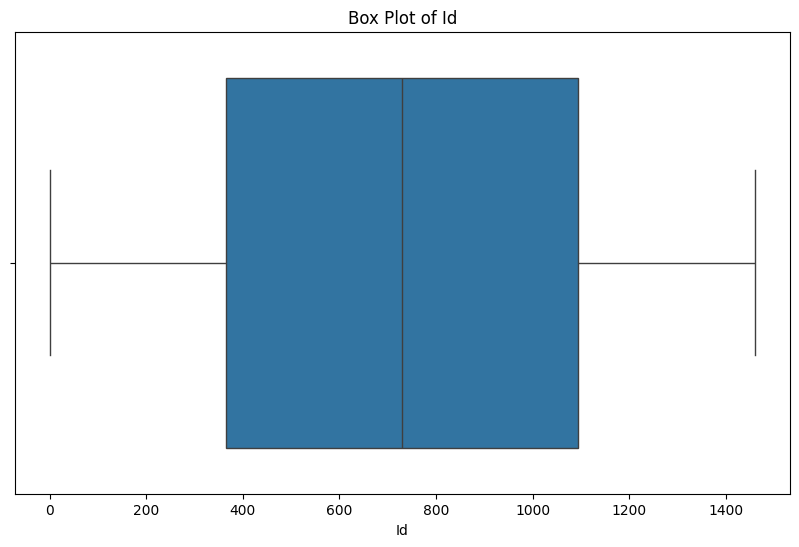

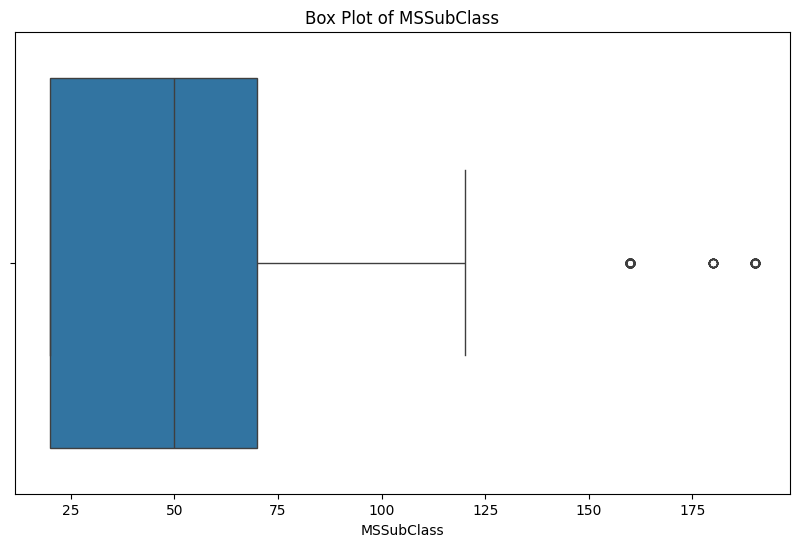

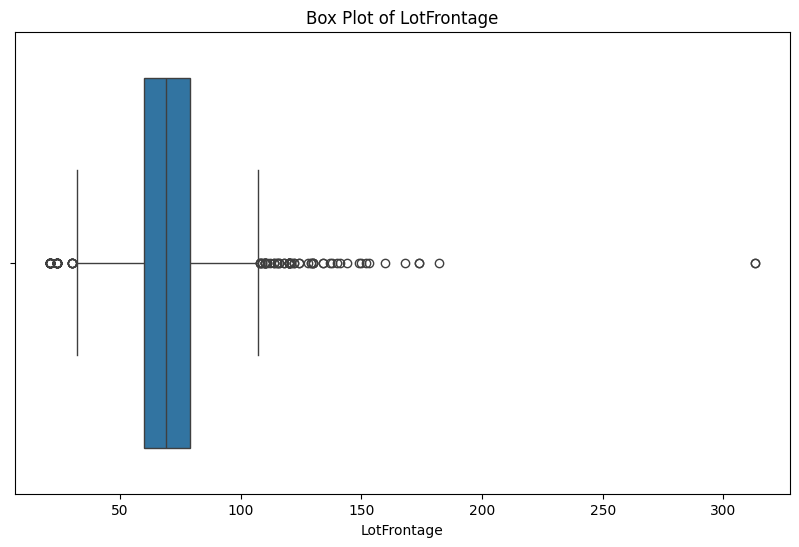

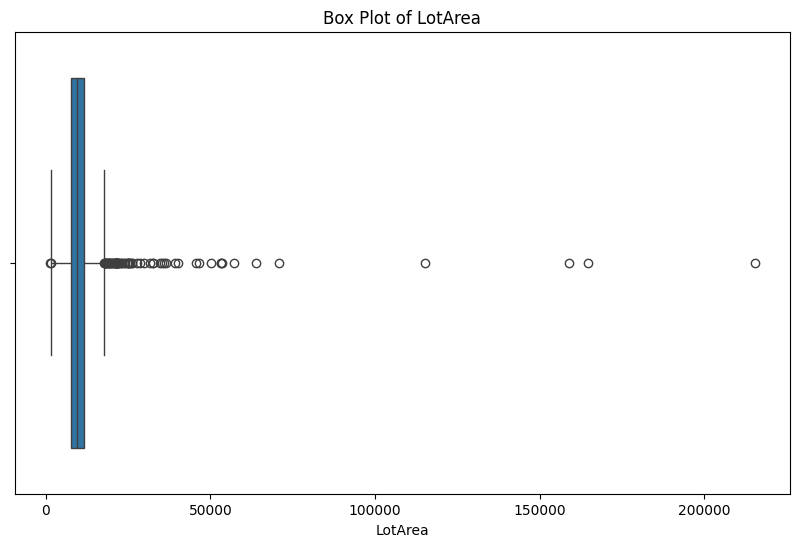

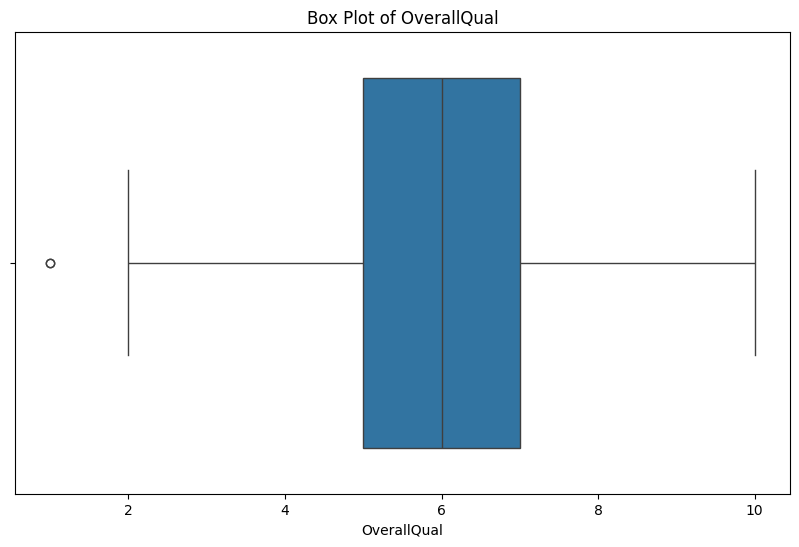

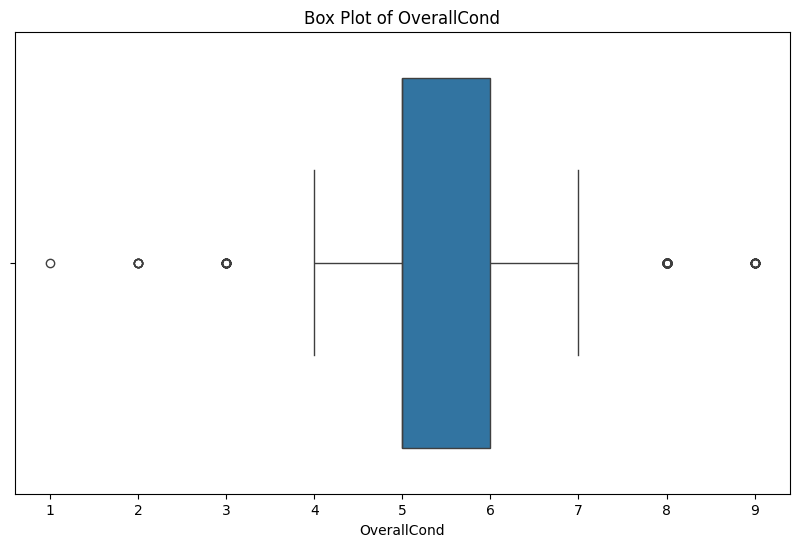

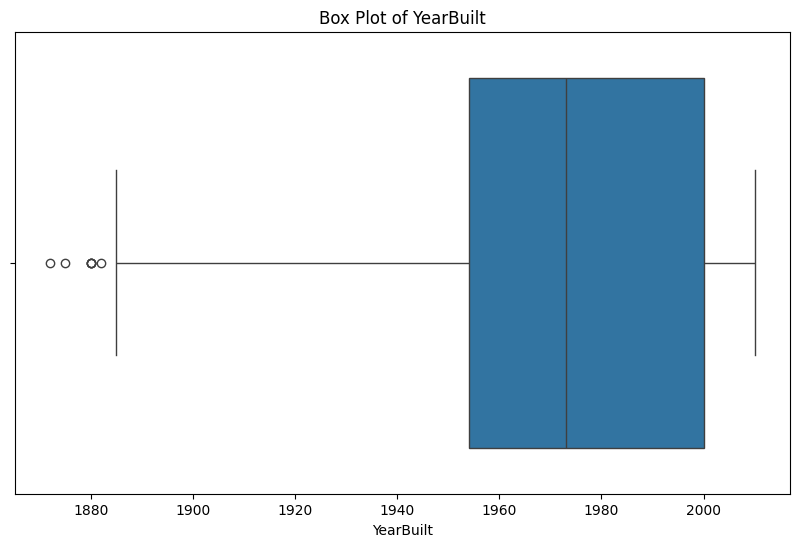

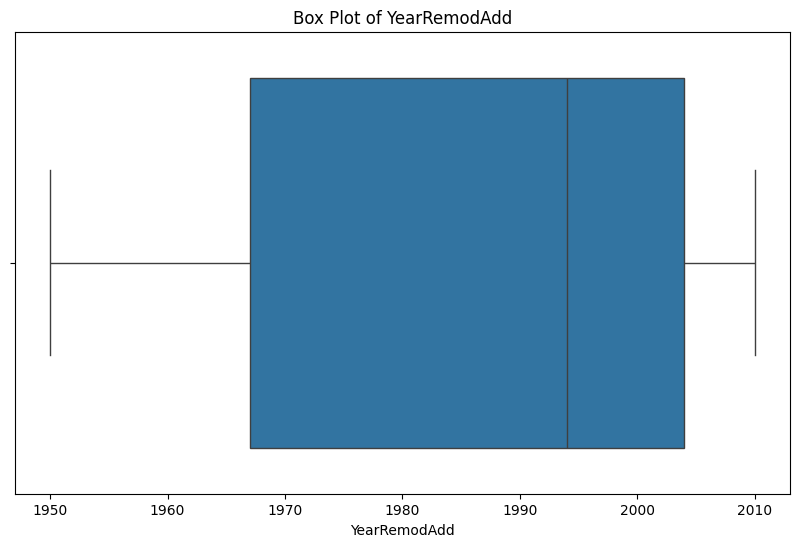

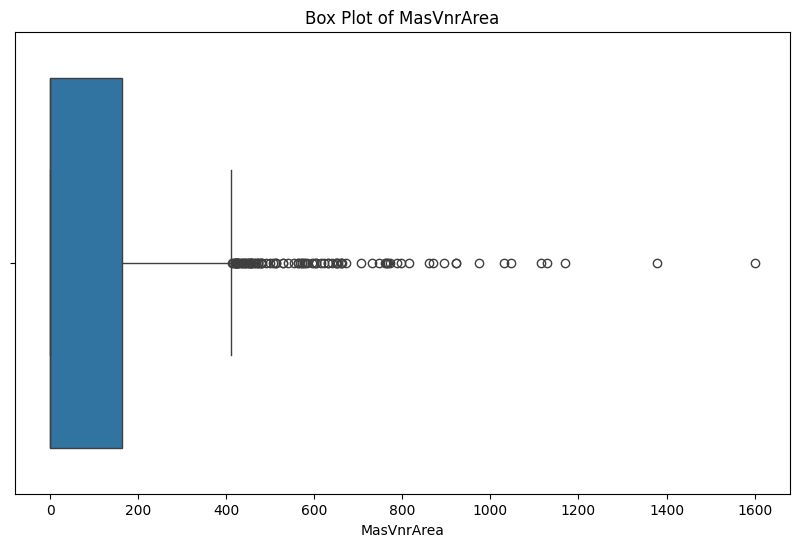

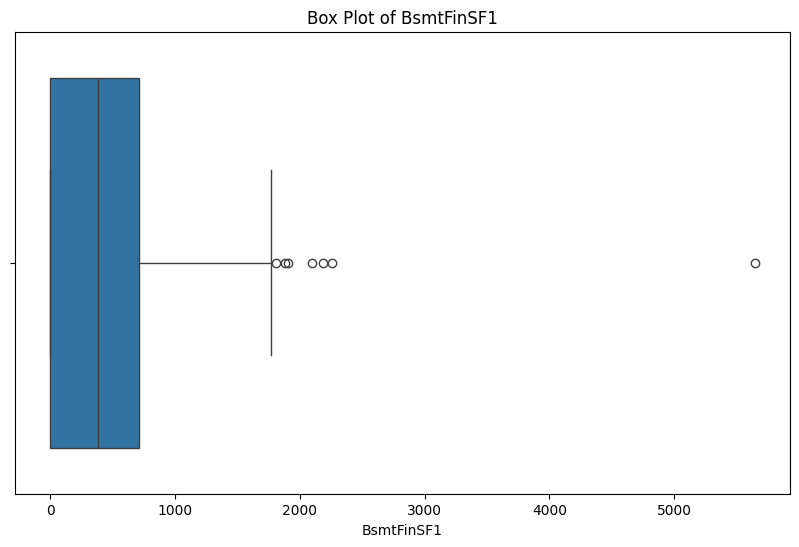

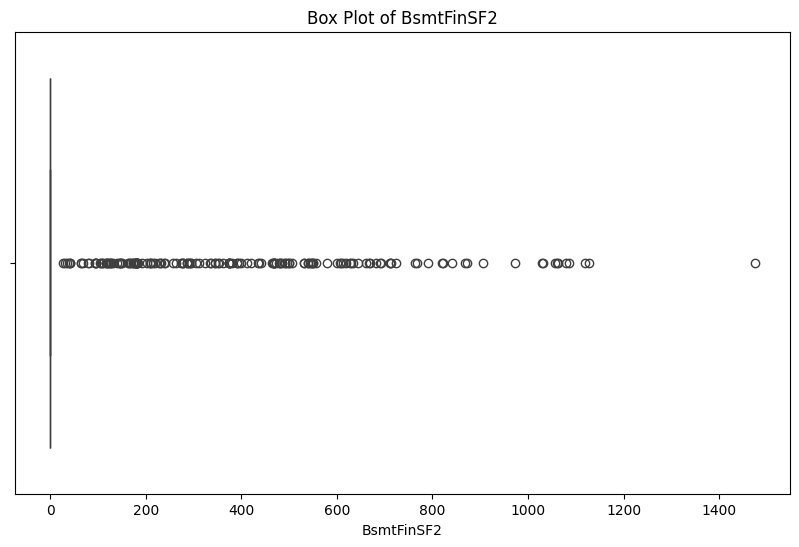

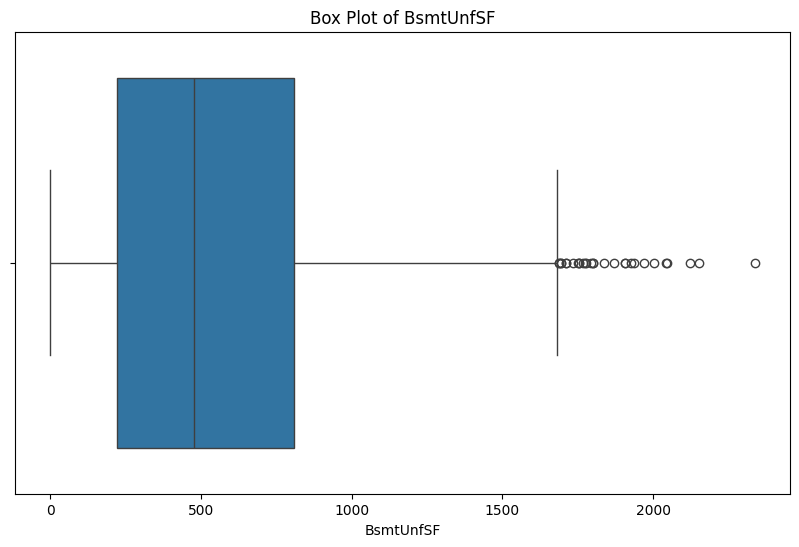

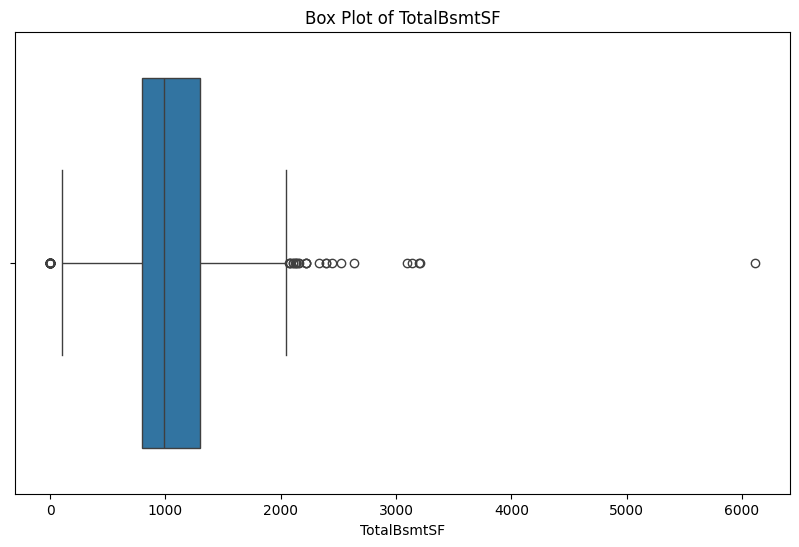

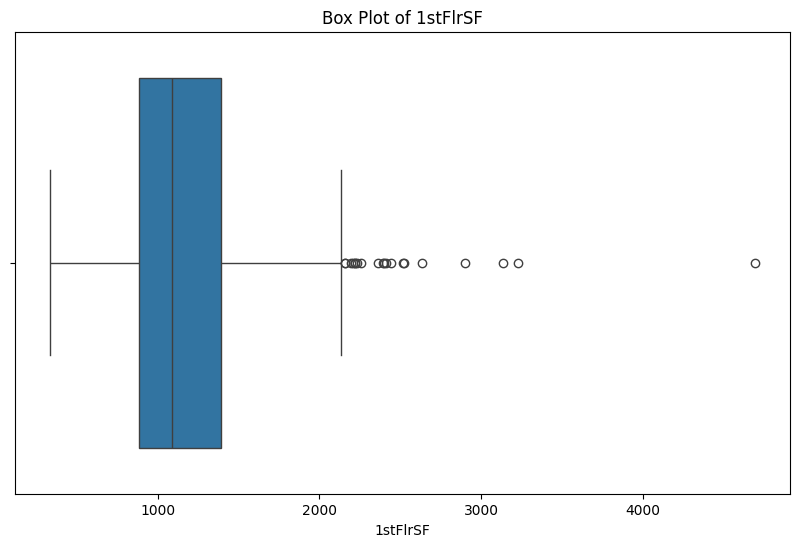

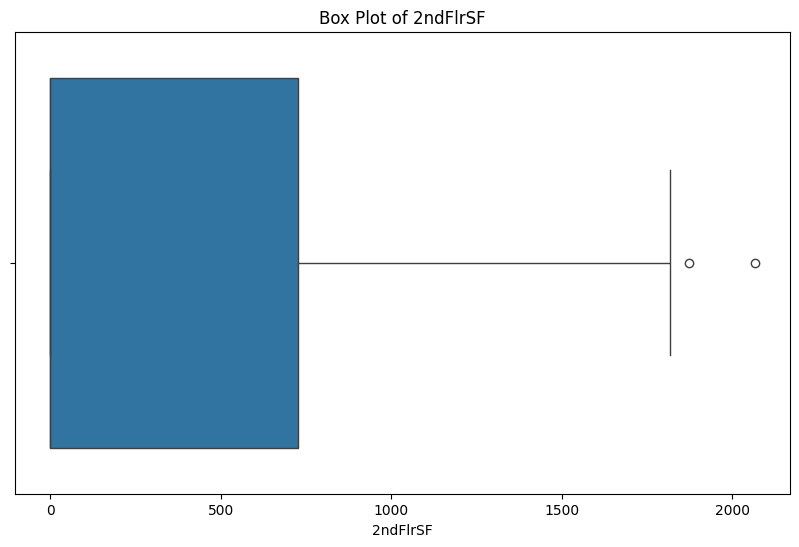

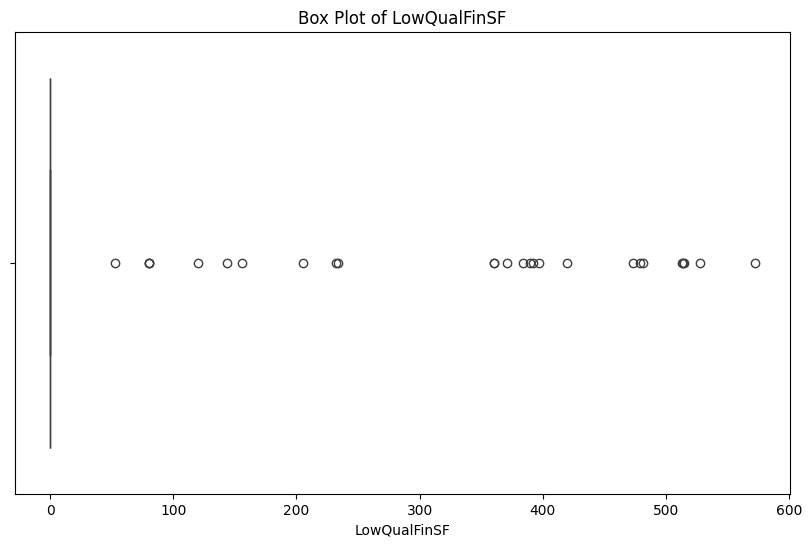

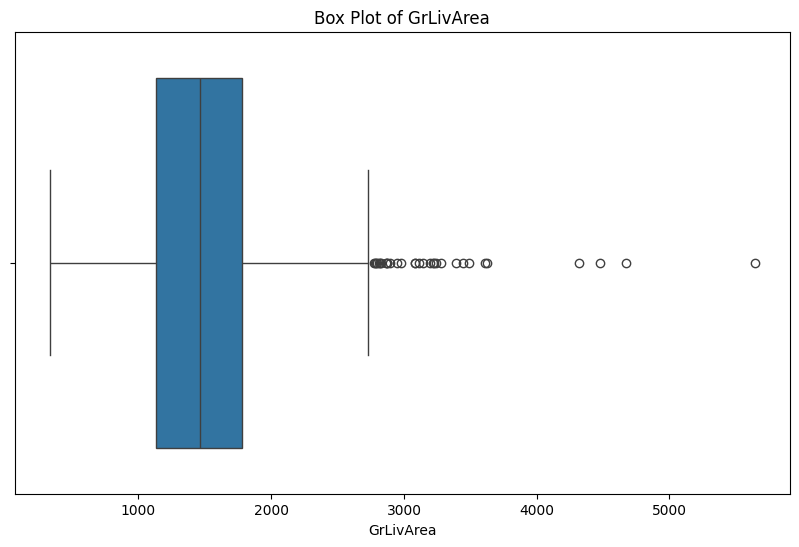

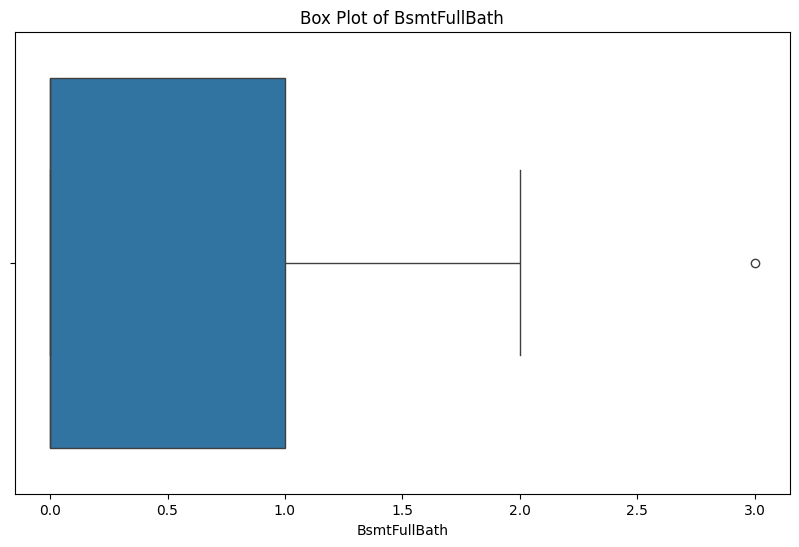

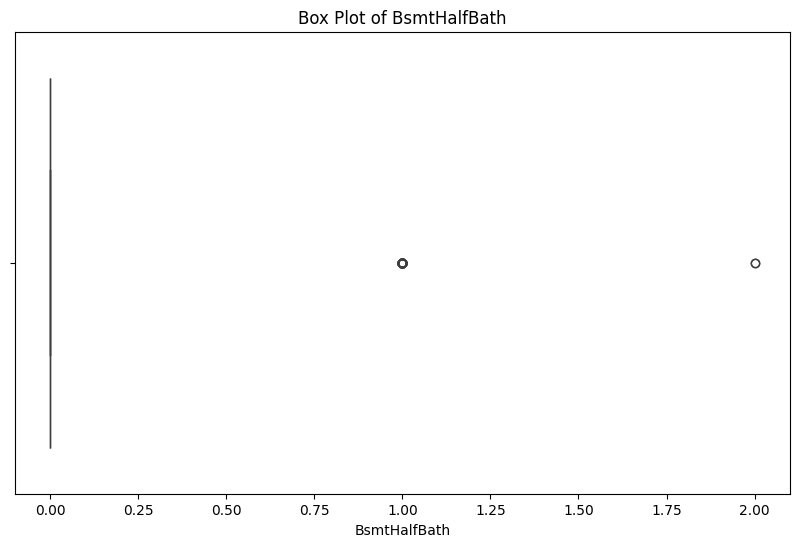

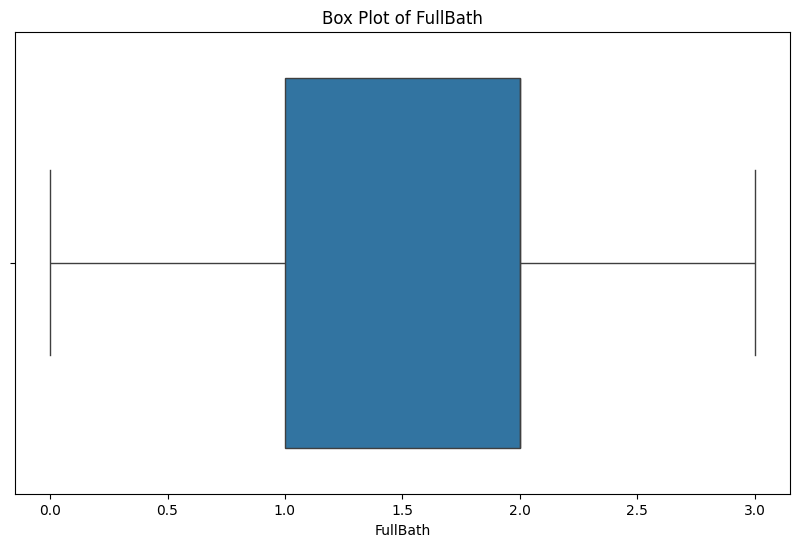

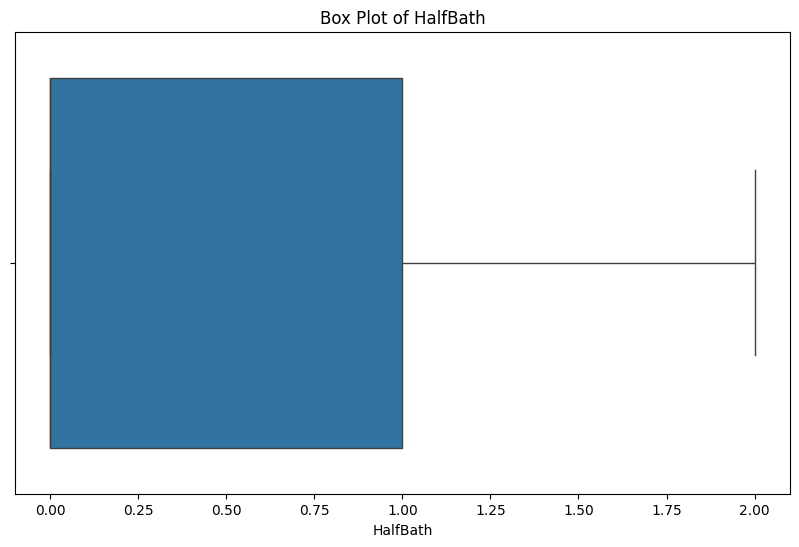

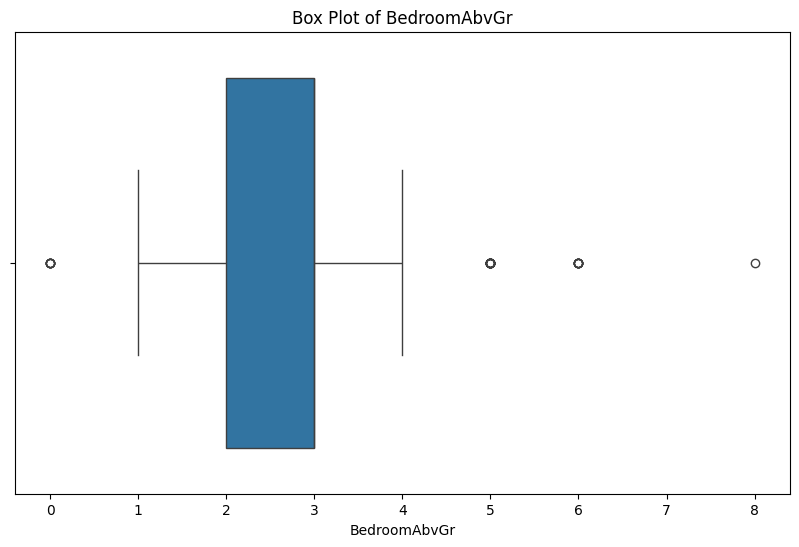

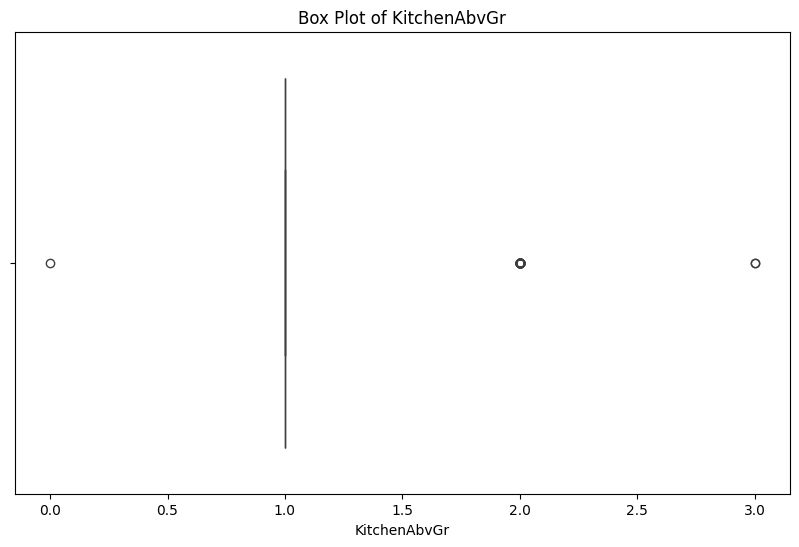

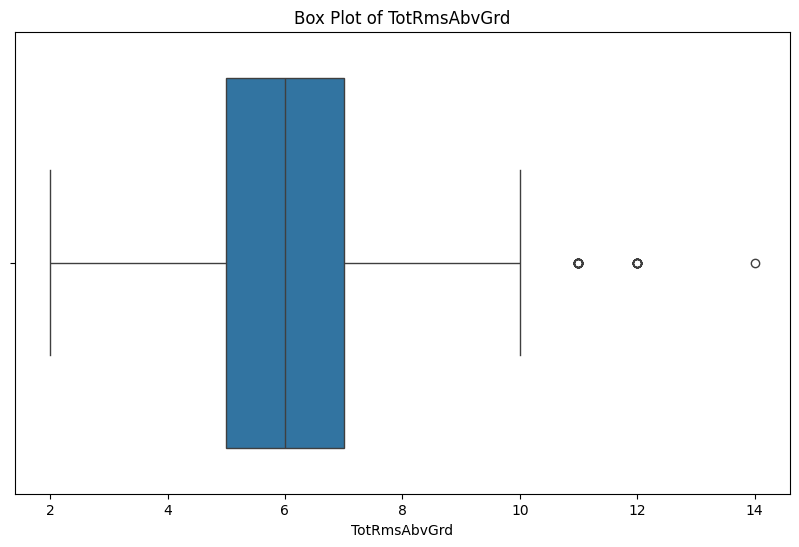

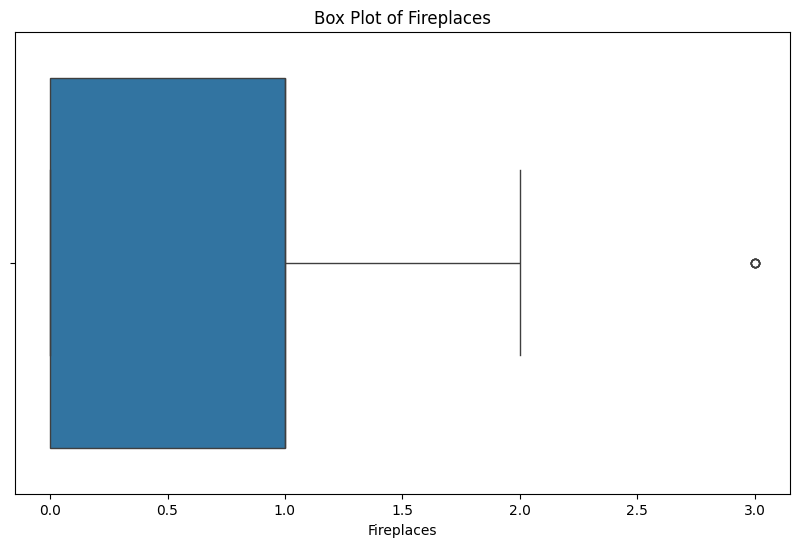

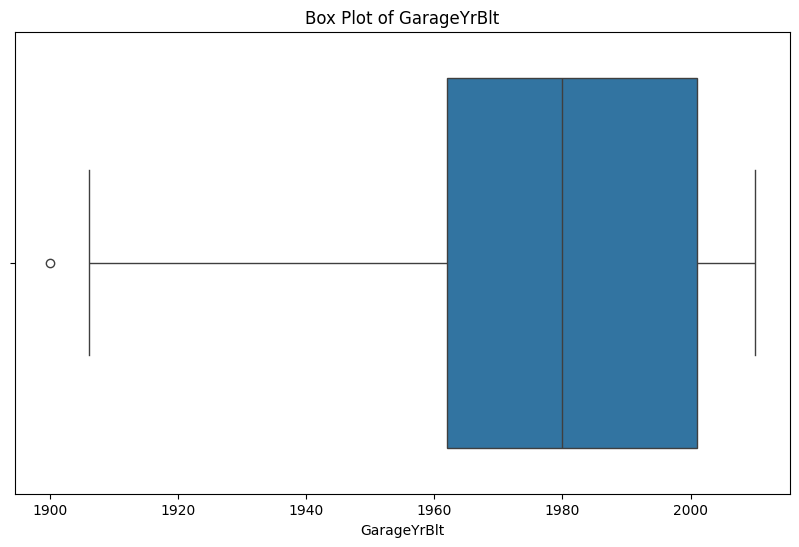

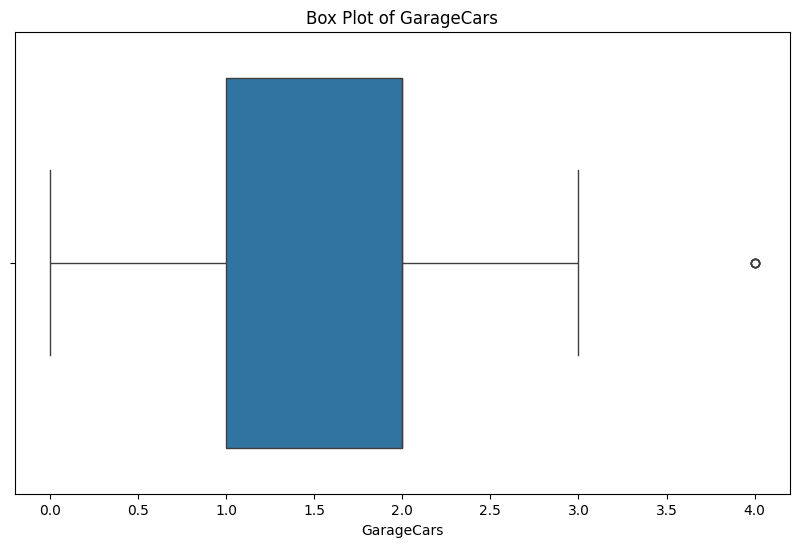

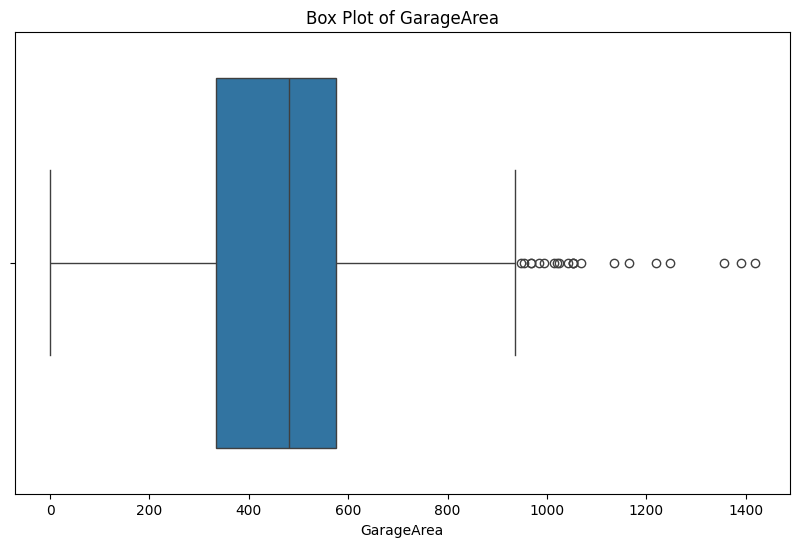

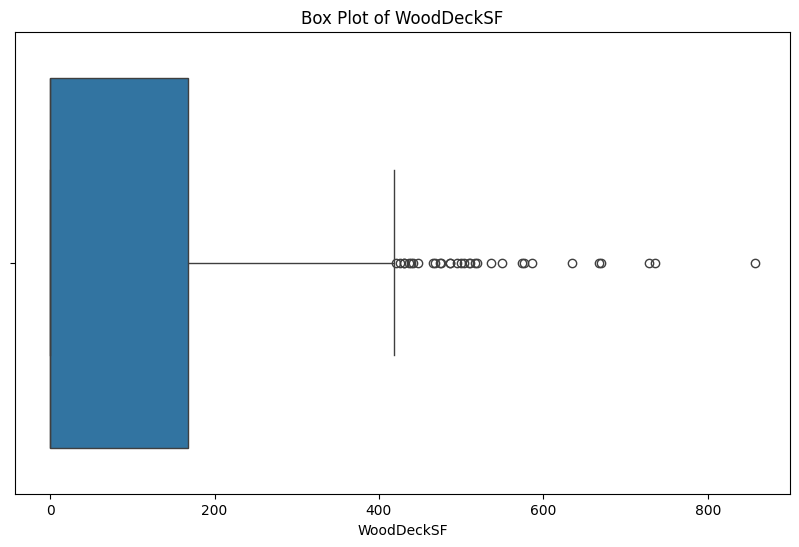

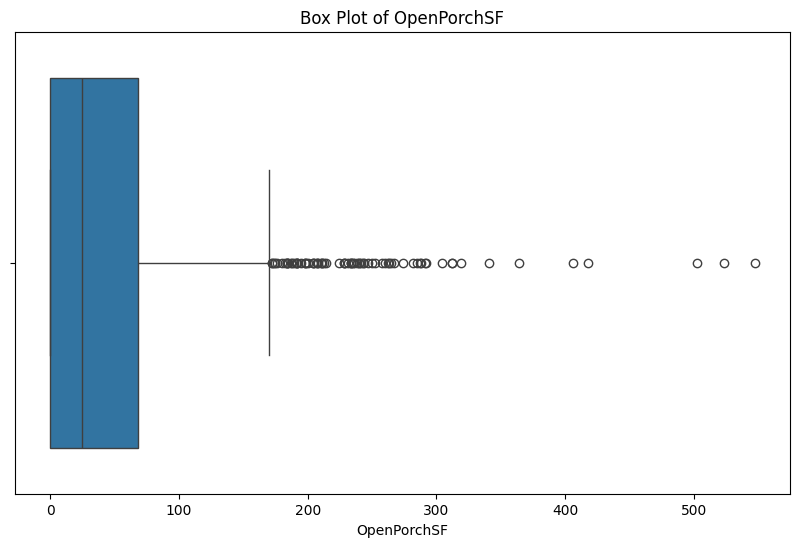

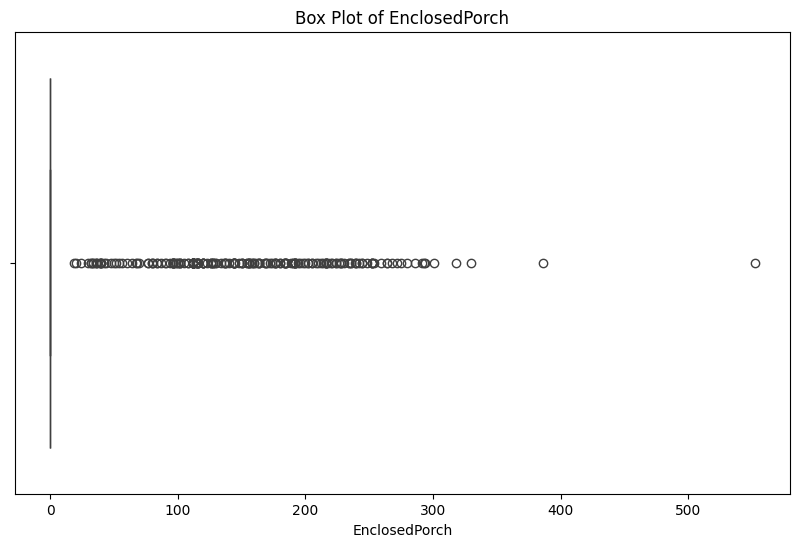

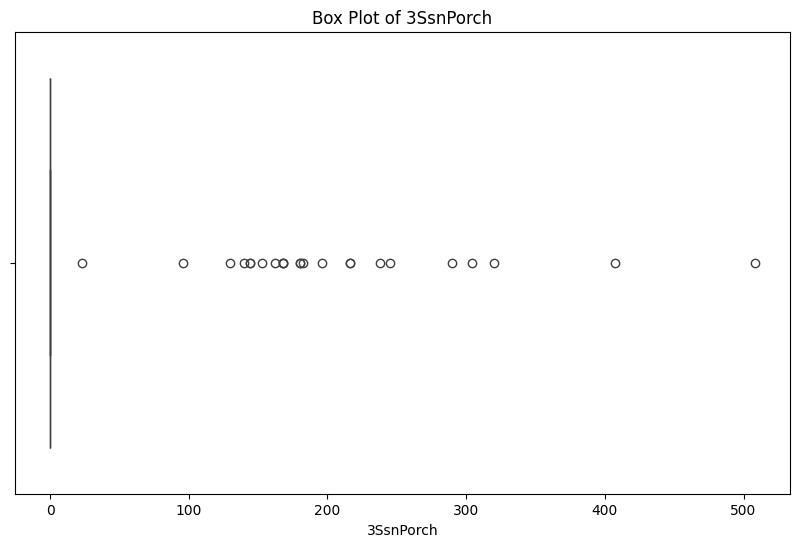

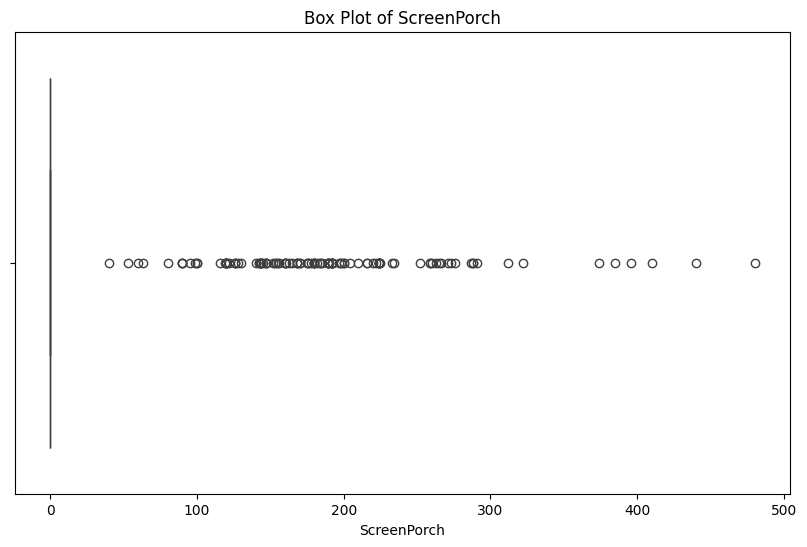

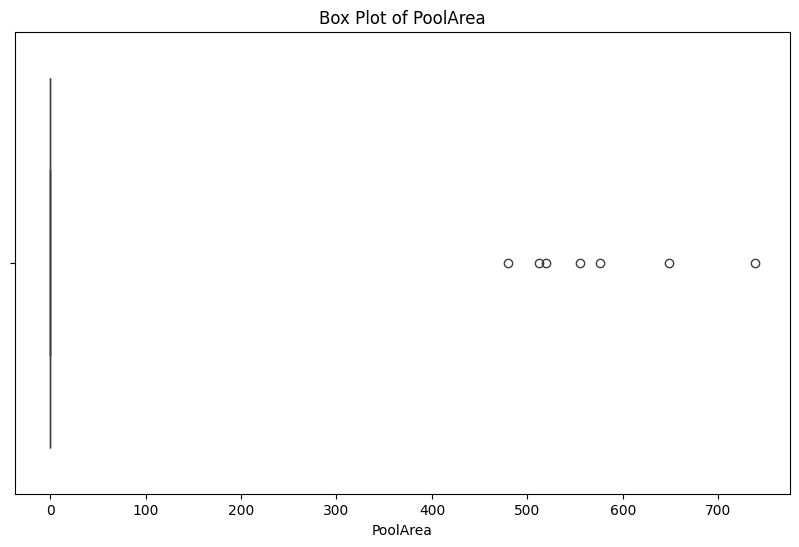

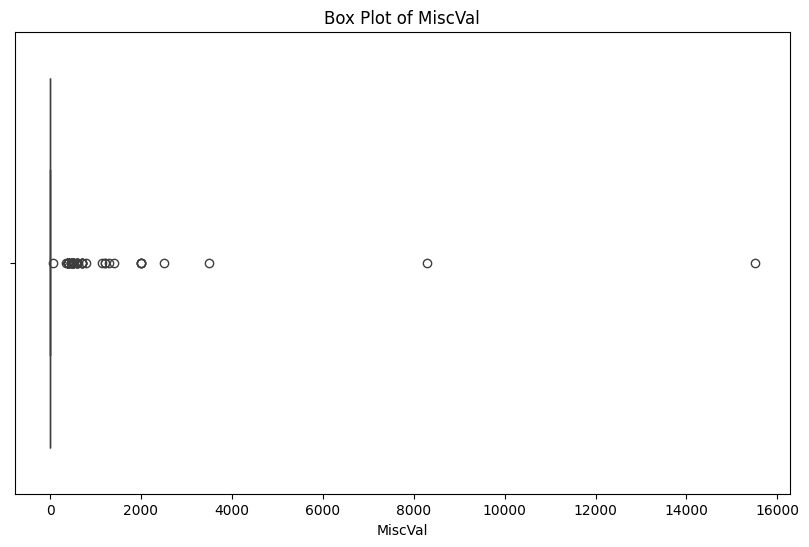

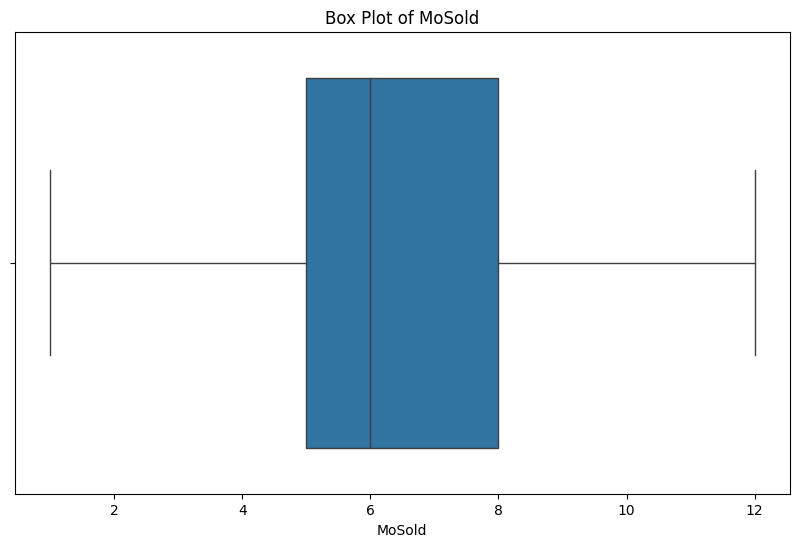

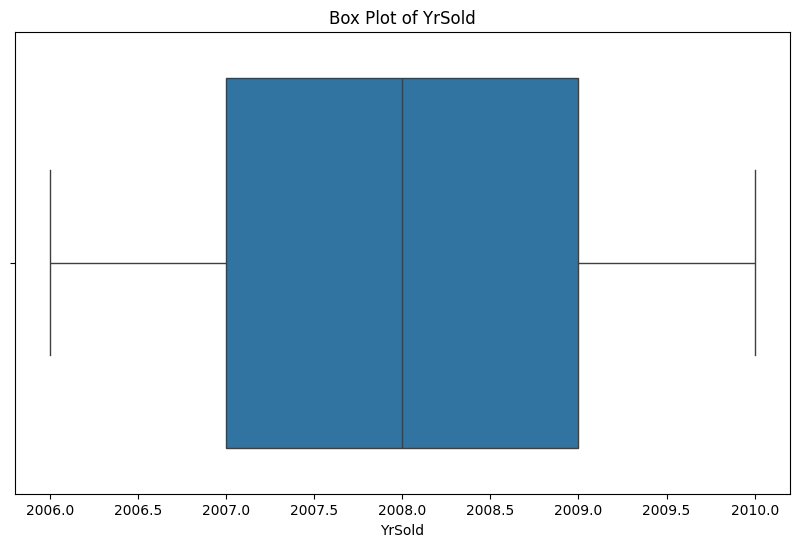

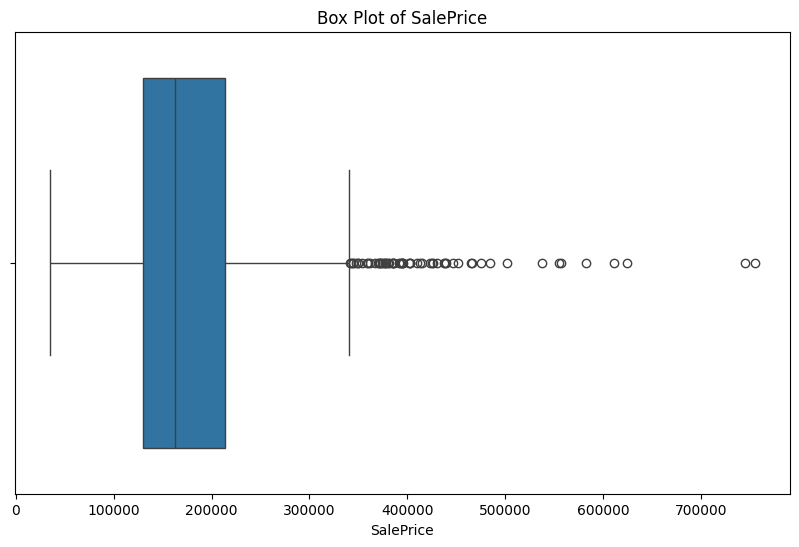

In [ ]:
# Plot IQR

import seaborn as sns
import matplotlib.pyplot as plt

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

The spots represent outliers in our data. We choose to delete, assuming these were caused by human error and deleting them won't affect descriptive analysis

In [ ]:
# Determine our Q1 and 3
Q1 = df[numeric_features].quantile(0.25)
Q3 = df[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Create a filter using defined value limits
condition = ~((df[numeric_features] < (Q1 - 1.5 * IQR)) | (df[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
df_filtered_numeric = df.loc[condition, numeric_features]

# Join with other columns
categorical_features = df.select_dtypes(include=['object']).columns
df = pd.concat([df_filtered_numeric, df.loc[condition, categorical_features]], axis=1)

In [ ]:
# # alternate 1: Change outlier values to median
# median = df['column_name'].median()
# df['column_name'] = df['column_name'].apply(lambda x: median if x < (Q1 - 1.5  IQR) or x > (Q3 + 1.5  IQR) else x)

# # alternate 2: Change outlier values to closest bound values
# lower_bound = Q1 - 1.5  IQR
# upper_bound = Q3 + 1.5  IQR
# df['column_name'] = df['column_name'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

## Scaling

Text(0.5, 1.0, 'Histogram')

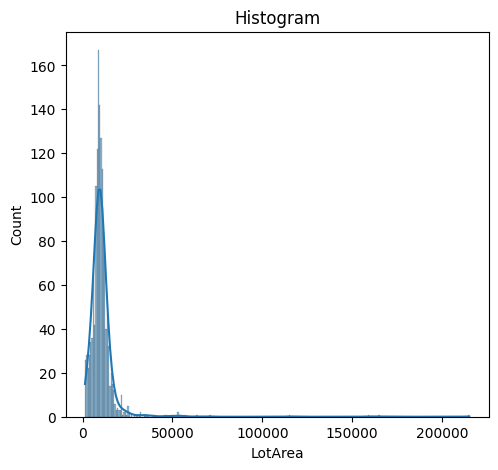

In [ ]:
# Let's check our data distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(train[numeric_features[3]], kde=True)
plt.title("Histogram")

We can see that our data has a bell shaped curve, this could be a reason to choose Stardization method to scale our data

Text(0.5, 1.0, 'Post-Standardization')

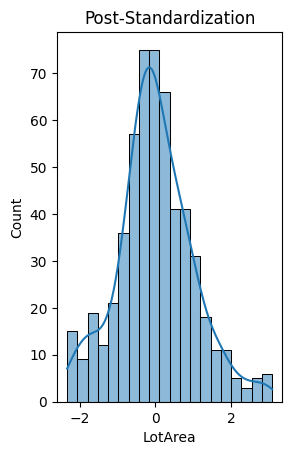

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Show Histogram
plt.subplot(1, 2, 2)
sns.histplot(df[numeric_features[3]], kde=True)
plt.title("Post-Standardization")

## Remove Duplicates

In [ ]:
duplicates = df.duplicated()
print("Duplicate rows: ", df[duplicates])

Duplicate rows:  Empty DataFrame
Columns: [Id, MSSubClass, LotFrontage, LotArea, OverallQual, OverallCond, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SalePrice, MSZoning, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, SaleType, SaleCondition]
Index: []

[0 rows x 77 columns]


There are no duplicates

In [ ]:
# # In case we have duplicated rows
# df = df.drop_duplicates()

## Data Conversion

Most models need numerical data as their input, this section will turn categorical data into their numeric representation

In [ ]:
# Check categorical features
category_features = df.select_dtypes(include=['object']).columns
df[category_features]

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
10,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,...,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,TA,Min2,Gd,Detchd,Unf,Fa,TA,Y,WD,Normal
1451,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Ex,Typ,Gd,Attchd,Fin,TA,TA,Y,New,Partial
1453,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,...,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD,Abnorml
1454,FV,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal


Let's try one-hot and label encoder method for this step

In [ ]:
df_one_hot = pd.get_dummies(df, columns=category_features)
df_one_hot

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,False,False,False,False,True,False,False,False,True,False
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,False,False,False,False,True,False,False,False,True,False
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,False,False,False,False,True,False,False,False,True,False
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,False,False,False,False,True,False,False,False,True,False
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.687057,0.038330,0.114843,0.934953,-1.801628,2.308244,-2.931004,0.551281,-0.701766,-1.088417,...,False,False,False,False,True,False,False,False,True,False
1451,1.694217,-0.917637,0.722611,0.014215,1.419903,-0.523677,0.983934,1.010957,1.164670,-1.088417,...,False,False,True,False,False,False,False,False,False,True
1453,1.698991,-0.917637,1.634263,2.938156,-0.996245,-0.523677,0.904038,0.857731,-0.701766,-1.088417,...,False,False,False,False,True,True,False,False,False,False
1454,1.701378,-0.917637,-0.492925,-0.633426,0.614520,-0.523677,0.824141,0.806656,-0.701766,-0.084995,...,False,False,False,False,True,False,False,False,True,False


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_lencoder = pd.DataFrame(df)

for col in category_features:
    df_lencoder[col] = label_encoder.fit_transform(df[col])

df_lencoder

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,-1.768952,0.356986,-0.265012,-0.284244,0.614520,-0.523677,0.784193,0.704506,1.183911,0.639427,...,2,4,2,0,1,2,3,2,8,3
2,-1.764179,0.356986,-0.037099,0.744924,0.614520,-0.523677,0.704296,0.653431,0.856804,0.101006,...,2,4,4,0,1,2,3,2,8,3
4,-1.759405,0.356986,1.178437,1.851281,1.419903,-0.523677,0.664347,0.551281,2.665515,0.514611,...,2,4,4,0,1,2,3,2,8,3
6,-1.754632,-0.917637,0.494698,0.316349,1.419903,-0.523677,0.824141,0.806656,1.087703,2.262035,...,2,4,2,0,1,2,3,2,8,3
10,-1.745085,-0.917637,0.114843,0.726546,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,1.128902,...,3,4,2,3,2,2,3,2,8,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,1.687057,0.038330,0.114843,0.934953,-1.801628,2.308244,-2.931004,0.551281,-0.701766,-1.088417,...,3,3,2,3,2,0,3,2,8,3
1451,1.694217,-0.917637,0.722611,0.014215,1.419903,-0.523677,0.983934,1.010957,1.164670,-1.088417,...,0,4,2,0,0,2,3,2,6,4
1453,1.698991,-0.917637,1.634263,2.938156,-0.996245,-0.523677,0.904038,0.857731,-0.701766,-1.088417,...,3,4,2,0,2,2,3,2,8,0
1454,1.701378,-0.917637,-0.492925,-0.633426,0.614520,-0.523677,0.824141,0.806656,-0.701766,-0.084995,...,2,4,2,0,1,2,3,2,8,3


We can see that our columns multiplied almost three times by using one hot encoding. To avoid overcomplexity, we will use label encoding. Keep in mind, that label, encoding always assume there is a hierarchial connection between different categories

## Exploratory and Explanatory Data Analysis

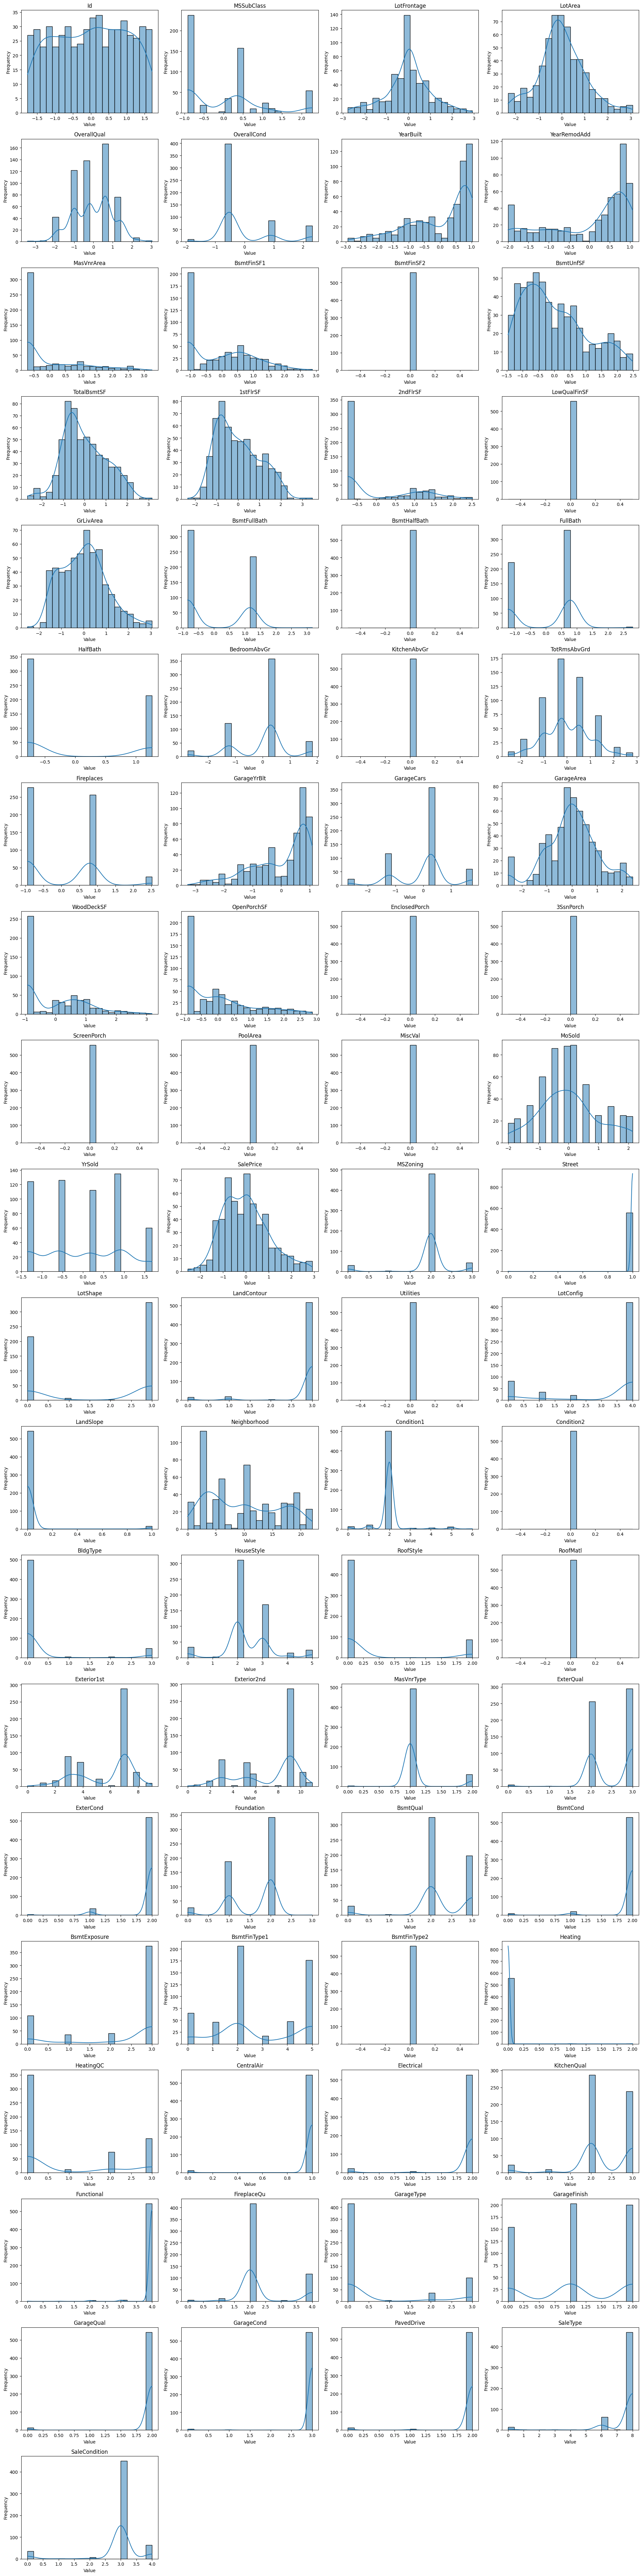

In [ ]:
# Amount of features
num_vars = df_lencoder.shape[1]

# Determine rows and columns for subplot
n_cols = 4
n_rows = -(-num_vars // n_cols)  # Ceiling division

# Create Subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Flatten axes array for easier loop
axes = axes.flatten()

# Plot each variables
for i, column in enumerate(df_lencoder.columns):
    sns.histplot(df_lencoder[column], ax=axes[i], kde=True, bins=20)
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Delete unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

These plots are to show data distribution for each colums

## Corellation

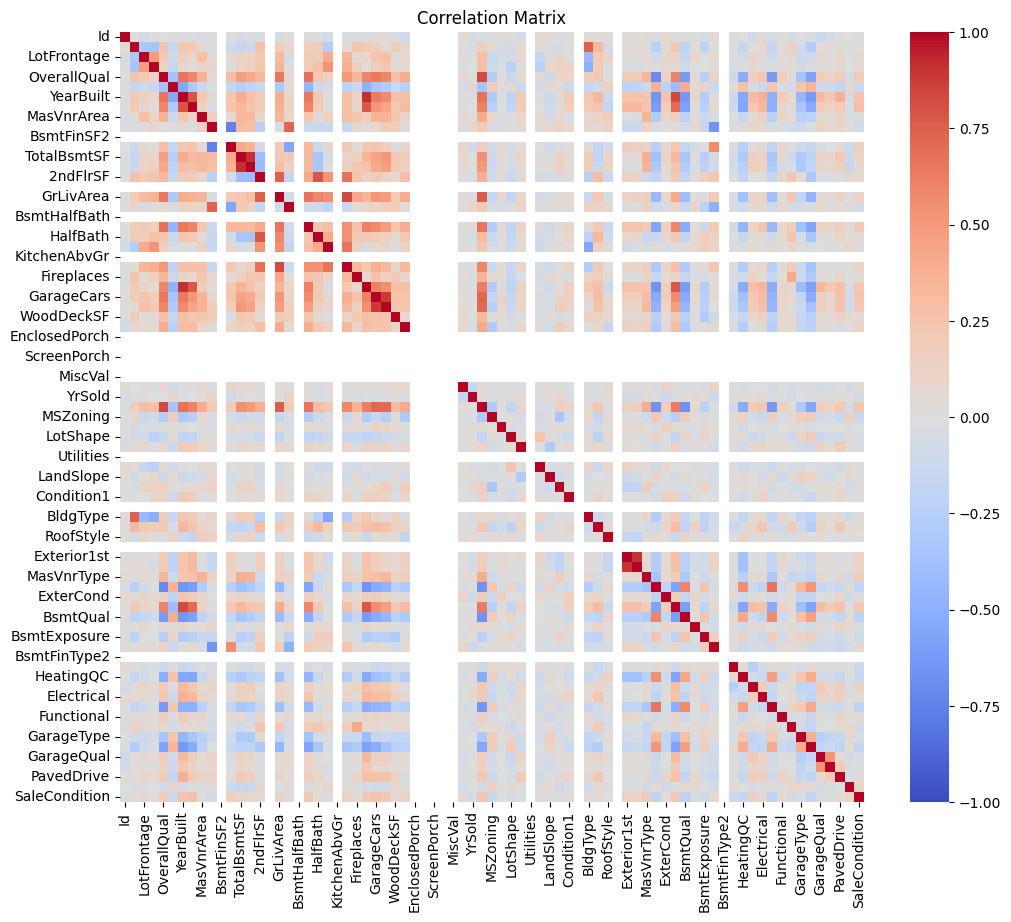

In [ ]:
# Visualize corellation for each features
plt.figure(figsize=(12, 10))
correlation_matrix = df_lencoder.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Since we are going to make a model to predict houce prices, let's see it's correlation with other features

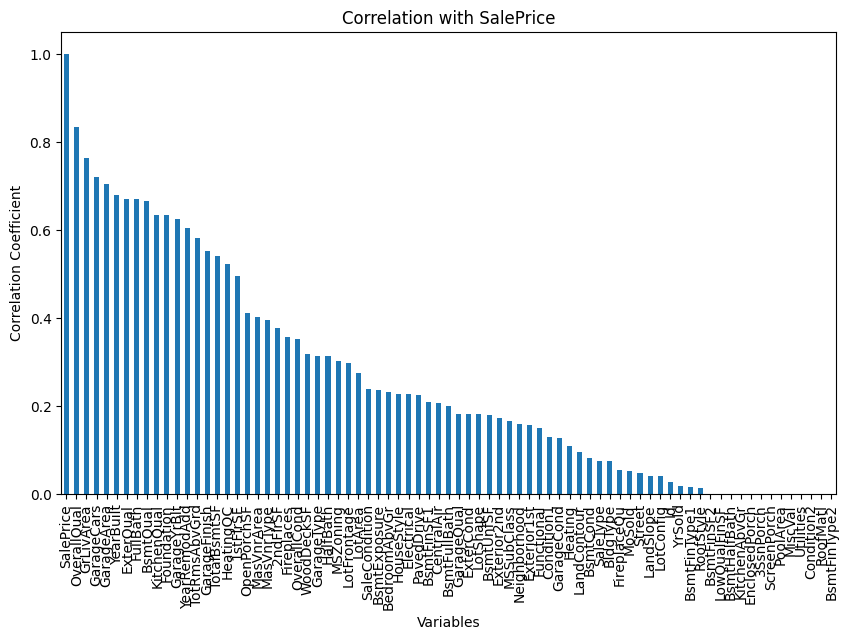

In [ ]:
# Calculate correlations and sort it
target_corr = df_lencoder.corr()['SalePrice']
target_corr_sorted = target_corr.abs().sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(10, 6))
target_corr_sorted.plot(kind='bar')

plt.title(f'Correlation with SalePrice')
plt.xlabel('Variables')
plt.ylabel('Correlation Coefficient')

# Show
plt.show()

We can just remove features that has low connection with sales price

In [ ]:
threshold = 0.3

high_corr_columns = target_corr[abs(target_corr) >= threshold].index
df_filtered = df_lencoder[high_corr_columns].reset_index(drop=True)

df_filtered.head()

,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,...,SalePrice,MSZoning,MasVnrType,ExterQual,Foundation,BsmtQual,HeatingQC,KitchenQual,GarageType,GarageFinish
0,0.614520,-0.523677,0.784193,0.704506,1.183911,-0.697482,-0.901932,1.314747,0.725374,0.787362,...,0.535556,2,1,2,2,2,0,2,0,1
1,0.614520,-0.523677,0.704296,0.653431,0.856804,-0.481947,-0.680593,1.343668,0.918998,0.787362,...,0.807206,2,1,2,2,2,0,2,0,1
2,1.419903,-0.523677,0.664347,0.551281,2.665515,0.275791,0.097550,1.794358,1.968640,0.787362,...,1.287121,2,1,2,2,2,0,2,0,1
3,1.419903,-0.523677,0.824141,0.806656,1.087703,2.097729,1.996219,-0.743486,0.684611,0.787362,...,2.319391,2,2,2,2,0,0,2,0,1
4,-0.996245,-0.523677,-0.733845,-1.236347,-0.701766,-0.077820,-0.265584,-0.743486,-0.981569,-1.215199,...,-0.895135,2,1,3,1,3,0,3,3,2


## Data Splitting

In [ ]:
# Split dataset for training and validation

import sklearn
from sklearn.model_selection import train_test_split

X = df_filtered.drop(columns=['SalePrice'])
y = df_filtered['SalePrice']

x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Check each data parts
print("Jumlah data: ",len(X))
print("Jumlah data latih: ",len(x_train))
print("Jumlah data test: ",len(x_test))

Jumlah data:  557
Jumlah data latih:  445
Jumlah data test:  112


## Model Development

### Least Angle Regression

In [ ]:
# Train
from sklearn import linear_model
lars = linear_model.Lars(n_nonzero_coefs=1).fit(x_train, y_train)

In [ ]:
# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred_lars = lars.predict(x_test)
mae_lars = mean_absolute_error(y_test, pred_lars)
mse_lars = mean_squared_error(y_test, pred_lars)
r2_lars = r2_score(y_test, pred_lars)

# Put results into a dataframe
data = {
    'MAE': [mae_lars],
    'MSE': [mse_lars],
    'R2': [r2_lars]
}

df_results = pd.DataFrame(data, index=['Lars'])
df_results

,MAE,MSE,R2
Lars,0.611331,0.593778,0.26033


### Linear Regression

In [ ]:
# Train
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train, y_train)

In [ ]:
# Evaluate
pred_LR = LR.predict(x_test)
mae_LR = mean_absolute_error(y_test, pred_LR)
mse_LR = mean_squared_error(y_test, pred_LR)
r2_LR = r2_score(y_test, pred_LR)

# Add results to dataframe
df_results.loc['Linear Regression'] = [mae_LR, mse_LR, r2_LR]
df_results

,MAE,MSE,R2
Lars,0.611331,0.593778,0.260330
Linear Regression,0.253963,0.107338,0.866289


### Gradient Boosting Regressor

In [ ]:
# Train
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(random_state=184)
GBR.fit(x_train, y_train)

GradientBoostingRegressor(random_state=184)

In [ ]:
# Evaluate
pred_GBR = GBR.predict(x_test)
mae_GBR = mean_absolute_error(y_test, pred_GBR)
mse_GBR = mean_squared_error(y_test, pred_GBR)
r2_GBR = r2_score(y_test, pred_GBR)

# Add results to dataframe
df_results.loc['GradientBoostingRegressor'] = [mae_GBR, mse_GBR, r2_GBR]
df_results

,MAE,MSE,R2
Lars,0.611331,0.593778,0.260330
Linear Regression,0.253963,0.107338,0.866289
GradientBoostingRegressor,0.240389,0.103346,0.871262
